In [265]:
import sys; sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from experiments import initial_mean_experiment, three_centered_dists_experiment

In [132]:
results_over_means = initial_mean_experiment(n_trials=100)

Bound = 0.35000000000000003
Running trials for 0.350
mean=0.35000000000000003, low=0.0, high=0.7000000000000001


KeyboardInterrupt: 

In [108]:
# idx = 6
means = list(results_over_means.keys())
n_means = len(means)
shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)



for idx in range(n_means):

    current_mean = means[idx]
    results_for_mean = list(results_over_means.values())[idx]['experiment_result']

    shifts = [el.shift for el in results_for_mean]
#     print(shifts)

    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)

print(means)
print(shift_mean_at_dist_mean)
print(shift_std_at_dist_mean)

sample_idx = 15
for idx in range(n_means):
#     print()
#     print(list(results_over_means.values())[idx]['initial_opinions'][sample_idx])
#     print(list(results_over_means.values())[idx]['final_opinions'][sample_idx])
    minit = list(results_over_means.values())[idx]['initial_opinions'][sample_idx].mean()
    mfinal = list(results_over_means.values())[idx]['final_opinions'][sample_idx].mean()
    print(f'init mean = {minit}, final mean = {mfinal}\ndiff = {mfinal - minit}')

['0.350', '0.525', '0.700', '0.875', '1.050', '1.225', '1.400', '1.575', '1.750', '1.925', '2.100', '2.275', '2.450', '2.625', '2.800', '2.975']
[-0.2848  0.2468  0.206   0.      0.     -0.1096 -0.346   0.3648  0.1368
  0.      0.     -0.1788 -0.2404  0.3352  0.068   0.    ]
[0.12215138 0.36332046 0.07681146 0.         0.         0.06108879
 0.17170906 0.17067208 0.06329107 0.         0.         0.07450208
 0.33190336 0.08537541 0.05138093 0.        ]
init mean = 0.12028260199782796, final mean = 0.12071451430611192
diff = 0.00043191230828396043
init mean = 0.1562292490934056, final mean = 0.16968474061189437
diff = 0.013455491518488766
init mean = 0.1962038066501939, final mean = 0.19512302499544798
diff = -0.001080781654745927
init mean = 0.23726586477161996, final mean = 0.252421493089242
diff = 0.015155628317622044
init mean = 0.3130525243091488, final mean = 0.3206914829575306
diff = 0.007638958648381766
init mean = 0.35765823286784426, final mean = 0.36710583292544485
diff = 0.00

Text(0.5, 1.0, 'n_iter=100, n_trials=100')

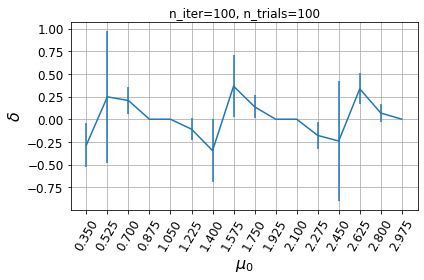

In [114]:
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=2*shift_std_at_dist_mean)
plt.xlabel('$\mu_0$', size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel('$\delta$', size=16)
plt.yticks(size=12)
plt.grid()
plt.title('n_iter=100, n_trials=100')

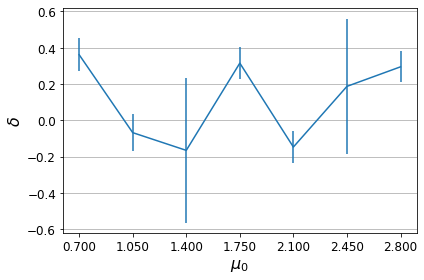

In [104]:
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=shift_std_at_dist_mean)
plt.xlabel('$\mu_0$', size=16)
plt.xticks(size=12)
plt.ylabel('$\delta$', size=16)
plt.yticks(size=12)
plt.grid(axis='y')
plt.title('n_iter=50, n_trials=100')

In [43]:
# mean_shifts = [set_res['experiment_result'].shift for set_res in res.values()]

mean_shifts = [
    np.mean([el.shift for el in trial_result])
    for set_result in res.values()
    for trial_result in set_result['experiment_result']
]

TypeError: 'ShiftExperimentResult' object is not iterable

## Same experiment but with normal dist


1. $\mu_0 \in \{0.1, 0.15, \ldots, 0.85\}$
1. $\sigma_0 = 0.1$ to get enough samples outside uniform dist to disrupt excessive shifts due to binning



In [115]:
results_over_means = initial_mean_experiment(dist='normal', n_trials=100)

Bound = 0.35000000000000003
Running trials for 0.350
Running trials for 0.525
Running trials for 0.700
Running trials for 0.875
Running trials for 1.050
Running trials for 1.225
Running trials for 1.400
Running trials for 1.575
Running trials for 1.750
Running trials for 1.925
Running trials for 2.100
Running trials for 2.275
Running trials for 2.450
Running trials for 2.625
Running trials for 2.800
Running trials for 2.975


In [116]:
 means = list(results_over_means.keys())
n_means = len(means)
shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)



for idx in range(n_means):

    current_mean = means[idx]
    results_for_mean = list(results_over_means.values())[idx]['experiment_result']

    shifts = [el.shift for el in results_for_mean]
#     print(shifts)

    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)

Text(0.5, 1.0, 'n_iter=100, n_trials=100')

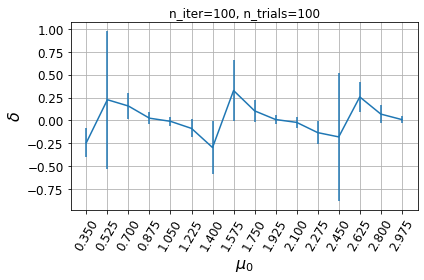

In [117]:
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=2*shift_std_at_dist_mean)
plt.xlabel('$\mu_0$', size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel('$\delta$', size=16)
plt.yticks(size=12)
plt.grid()
plt.title('n_iter=100, n_trials=100')

## Three symmetric distributions centered at 0.5

1. Uniform
1. Normal
1. Beta with $\alpha=\beta=2$ (see examples below)

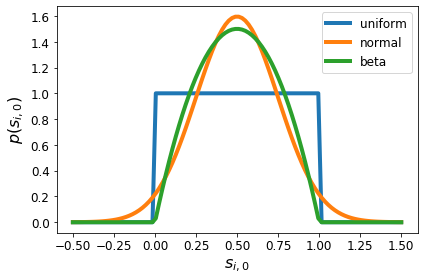

In [211]:
from scipy.stats import beta, uniform, norm

x = np.linspace(-0.5, 1.5, num=100)
unif = uniform.pdf(x)
norm = norm.pdf(x, loc=0.5, scale=0.25)
beta = beta.pdf(x, a=2, b=2, loc=0, scale=1)

plt.plot(x, unif, label='uniform', lw=4)
plt.plot(x, norm, label='normal', lw=4)
plt.plot(x, beta, label='beta', lw=4)

plt.xlabel(r'$s_{i,0}$', size=16)
plt.ylabel(r'$p(s_{i,0})$', size=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.legend(prop={'size': 12})

plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/distros.pdf')

### Uniform distribution

In [266]:
uniform_result = three_centered_dists_experiment(n_trials=100)

print(uniform_result['experiment_result'][0].shift)
print(np.mean([el.shift for el in uniform_result['experiment_result']]))
print(np.std([el.shift for el in uniform_result['experiment_result']]))

0.3999999999999999
0.4444000000000001
0.3064582190119886


### Normal distribution

In [267]:
normal_result = three_centered_dists_experiment(dist='normal', n_trials=100)

# print(normal_result['experiment_result'][0].shift)
print(np.mean([el.shift for el in normal_result['experiment_result']]))
print(np.std([el.shift for el in normal_result['experiment_result']]))

0.3416
0.21085881532437764


### Beta distribution $\alpha=\beta=2$

In [268]:
beta_result = three_centered_dists_experiment(dist='beta', n_trials=100)

print(beta_result['experiment_result'][0].shift)
print(np.mean([el.shift for el in beta_result['experiment_result']]))
print(np.std([el.shift for el in beta_result['experiment_result']]))

0.040000000000000036
0.22400000000000003
0.14783774890061063


I want to see the distributions as well as the means and standard deviations, so I will plot using seaborn strip plot to complement a table I made in the paper with $\langle \delta \rangle$ as a function of distro.

100


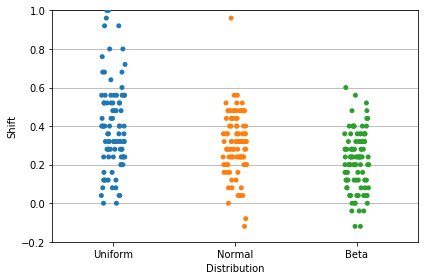

In [272]:
import seaborn as sns
import pandas as pd

# make df two cols: (distro, shift)
uniform_shifts = [el.shift for el in uniform_result['experiment_result']]
uniform_cshifts = [el.contin_shift for el in uniform_result['experiment_result']]
uniform_labels = ['Uniform']*len(uniform_shifts)

norm_shifts = [el.shift for el in normal_result['experiment_result']]
norm_cshifts = [el.contin_shift for el in normal_result['experiment_result']]
norm_labels = ['Normal']*len(norm_shifts)

beta_shifts = [el.shift for el in beta_result['experiment_result']]
beta_cshifts = [el.contin_shift for el in beta_result['experiment_result']]
beta_labels = ['Beta']*len(beta_shifts)

df = pd.DataFrame({
    'Distribution': uniform_labels + norm_labels + beta_labels,
    'Shift': uniform_shifts + norm_shifts + beta_shifts,
    'CShift': uniform_cshifts + norm_cshifts + beta_cshifts
})
print(len(uniform_shifts))
# Plot.
ax = sns.stripplot(x='Distribution', y='Shift', data=df)
plt.ylim(-.2, 1)
plt.grid(axis='y')

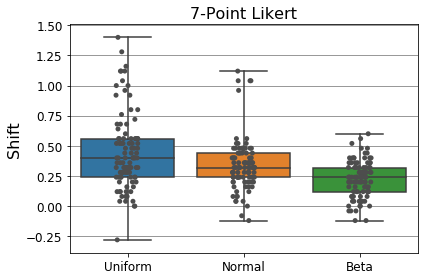

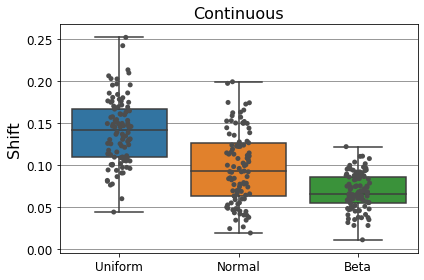

In [279]:

ax = sns.boxplot(x="Distribution", y="Shift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="Distribution", y="Shift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
# plt.xlabel('Distribution', size=16)
plt.xlabel('')
plt.ylabel('Shift', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('7-Point Likert', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ShiftVsDist.pdf')


plt.figure()
ax = sns.boxplot(x="Distribution", y="CShift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="Distribution", y="CShift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
# plt.xlabel('Distribution', size=16)
plt.xlabel('')
plt.ylabel('Shift', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Continuous', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/CShiftVsDist.pdf')

#### Experiment with same standard deviation for Normal, evaluate different init norms

I'll do a similar experiment as before with $\mu_0 \in \{0.2, 0.3, \ldots, 0.8\}$ in order to evaluate how that changes things. Hope to get the sort of plot in Figure 1 of Myers (1982) where shift increases as initial mean increases in extremity. However, we may see the same sort of binning noise found in the sweeps above for a smaller standard deviation. Standard deviation in the above experiments over distribution used extremity_factor * 0.25 as the mean.

In [226]:
extremity_factor = 3.5
stddev = extremity_factor * 0.25
means = extremity_factor * np.arange(start=.2, stop=.81, step=.1)
print(means)
norm_over_means = initial_mean_experiment(
    means=means, stddev=stddev, dist='normal', n_trials=100
)

[0.7  1.05 1.4  1.75 2.1  2.45 2.8 ]
Bound = 0.7000000000000001
Running trials for 0.700
Running trials for 1.050
Running trials for 1.400
Running trials for 1.750
Running trials for 2.100
Running trials for 2.450
Running trials for 2.800


Text(0.5, 1.0, 'n_iter=100, n_trials=100')

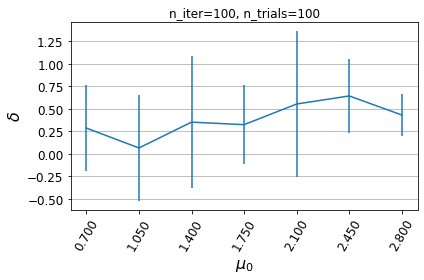

In [237]:
means = list(norm_over_means.keys())
n_means = len(means)
shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)


df = pd.DataFrame(columns=['InitialMean', 'Shift'])
for idx in range(n_means):
    

    current_mean = means[idx]
    results_for_mean = list(norm_over_means.values())[idx]['experiment_result']

    shifts = [el.shift for el in results_for_mean]
#     print(shifts)

    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)
    
    df_part = pd.DataFrame({
        'InitialMean': [current_mean] * len(shifts),
        'Shift': shifts
    })

    df = df.append(df_part)
    
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=2*shift_std_at_dist_mean)
plt.xlabel('$\mu_0$', size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel('$\delta$', size=16)
plt.yticks(size=12)
plt.grid(axis='y')
plt.title('n_iter=100, n_trials=100')

In [238]:
df.head()

,InitialMean,Shift
0,0.700,0.48
1,0.700,0.24
2,0.700,-0.36
3,0.700,0.40
4,0.700,0.44


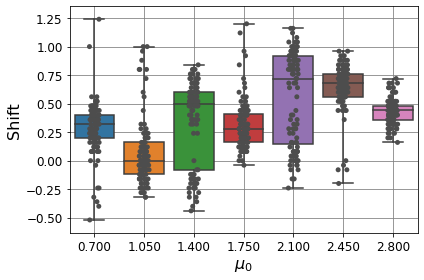

In [240]:
ax = sns.boxplot(x="InitialMean", y="Shift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="InitialMean", y="Shift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
plt.xlabel('$\mu_0$', size=16)
plt.ylabel('Shift', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ShiftVsDist.pdf')

One more experiment with this simple normally-distributed case: bound values less than zero to be zero. Introducing a `bound_zero` kwarg.

In [245]:
extremity_factor = 3.5
stddev = extremity_factor * 0.25
means = extremity_factor * np.arange(start=.2, stop=.81, step=.1)

norm_over_means = initial_mean_experiment(
    means=means, stddev=stddev, dist='normal', n_trials=100, bound_zero=True
)

Bound = 0.7000000000000001
Running trials for 0.700
Running trials for 1.050
Running trials for 1.400
Running trials for 1.750
Running trials for 2.100
Running trials for 2.450
Running trials for 2.800


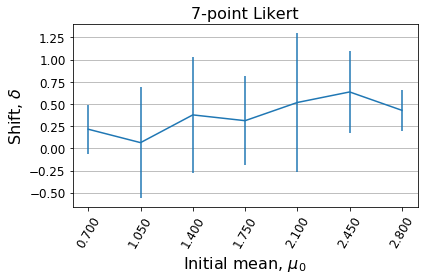

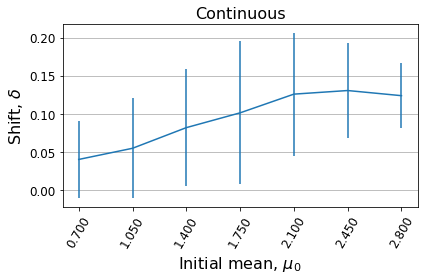

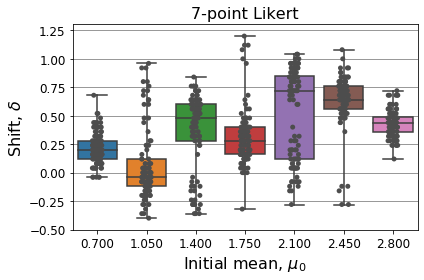

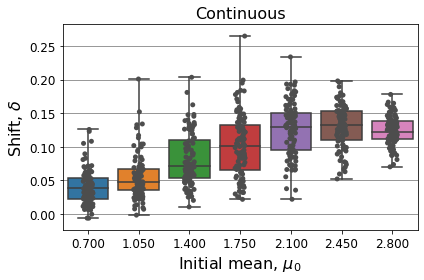

In [264]:
means = list(norm_over_means.keys())
n_means = len(means)

shift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
shift_std_at_dist_mean = np.zeros((n_means,), dtype=float)
cshift_mean_at_dist_mean = np.zeros((n_means,), dtype=float)
cshift_std_at_dist_mean = np.zeros((n_means,), dtype=float)


df = pd.DataFrame(columns=['InitialMean', 'Shift', 'CShift'])
for idx in range(n_means):
    
    current_mean = means[idx]
    results_for_mean = list(norm_over_means.values())[idx]['experiment_result']

    shifts = [el.shift for el in results_for_mean]
    contin_shifts = [el.contin_shift for el in results_for_mean]
#     print(shifts)

    shift_mean_at_dist_mean[idx] = np.mean(shifts)
    shift_std_at_dist_mean[idx] = np.std(shifts)
    cshift_mean_at_dist_mean[idx] = np.mean(contin_shifts)
    cshift_std_at_dist_mean[idx] = np.std(contin_shifts)
    
    df_part = pd.DataFrame({
        'InitialMean': [current_mean] * len(shifts),
        'Shift': shifts,
        'CShift': contin_shifts
    })

    df = df.append(df_part)
    
    
# Begin plotting four cases.
xlabel = r'Initial mean, $\mu_0$'
ylabel = r'Shift, $\delta$'
plt.errorbar(x=means, y=shift_mean_at_dist_mean, yerr=2*shift_std_at_dist_mean)
plt.xlabel(xlabel, size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel(ylabel, size=16)
plt.yticks(size=12)
plt.grid(axis='y')
plt.title('7-point Likert', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/7pointLikertSeries.pdf')

plt.figure()
plt.errorbar(x=means, y=cshift_mean_at_dist_mean, yerr=2*cshift_std_at_dist_mean)
plt.xlabel(xlabel, size=16)
plt.xticks(size=12, rotation=60)
plt.ylabel(ylabel, size=16)
plt.yticks(size=12)
plt.grid(axis='y')
plt.title('Continuous', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ContinuousSeries.pdf')

plt.figure()
ax = sns.boxplot(x="InitialMean", y="Shift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="InitialMean", y="Shift", data=df, jitter=True, color=".3")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
# ax.xaxis.grid(color='gray')
plt.xlabel(xlabel, size=16)
plt.ylabel(ylabel, size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('7-point Likert', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/7pointLikertBoxplot.pdf')

plt.figure()
ax = sns.boxplot(x="InitialMean", y="CShift", data=df, whis=np.inf)
# ax = sns.boxplot(x="Distribution", y="Shift", data=df)
ax = sns.stripplot(x="InitialMean", y="CShift", data=df, jitter=True, color=".3")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
# ax.xaxis.grid(color='gray')
plt.xlabel(xlabel, size=16)
plt.ylabel(ylabel, size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Continuous', size=16)
plt.savefig('/Users/mt/workspace/papers/cogsci2020/Figures/ContinuousBoxplot.pdf')

### Quick evaluation of beta distribution for initial opinions

In [119]:
rng = range(1, 6)
x = [np.random.beta(2, idx, int(1e5)) for idx in rng]

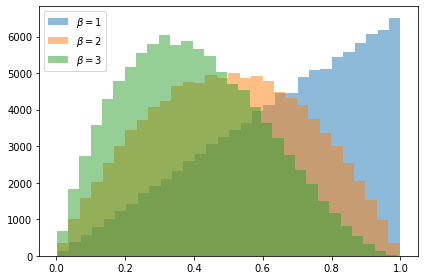

In [129]:
plt.hist(x[0], bins=30, alpha=0.5, label=r'$\beta=1$')
plt.hist(x[1], bins=30, alpha=0.5, label=r'$\beta=2$')
plt.hist(x[2], bins=30, alpha=0.5, label=r'$\beta=3$')
plt.legend()

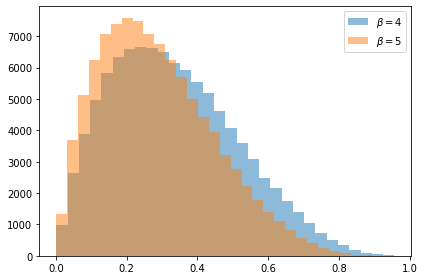

In [130]:
plt.hist(x[3], bins=30, alpha=0.5, label=r'$\beta=4$')
plt.hist(x[4], bins=30, alpha=0.5, label=r'$\beta=5$')
# plt.hist(x[2], bins=30, alpha=0.5, label=r'$\beta=$')
plt.legend()

['Computer Modern Roman']


Text(0, 0.5, 'Serenity')

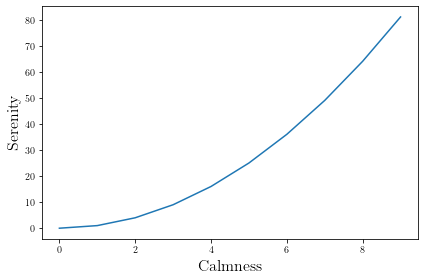

In [5]:
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)

# font = {'family':'serif','size':16} 
print(rcParams['font.serif'])
plt.plot(np.power(np.arange(10), 2))
plt.xlabel('Calmness', size=16)
plt.ylabel('Serenity', size=16)